In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
%config InlineBackend.print_figure_kwargs={'bbox_inches':None}
plt.rcParams['figure.dpi'] = 150

In [2]:
heights = pd.read_csv("sydtoppen.csv", sep=";", squeeze=True, index_col=0, parse_dates=True)
heights.head()

year
1947-01-01    2115.0
1948-01-01       NaN
1949-01-01       NaN
1950-01-01       NaN
1951-01-01    2119.0
Name: elevation, dtype: float64

In [3]:
balance = pd.read_csv("mass_balance.csv", sep=";", index_col=0, parse_dates=True)
balance = balance.applymap(lambda x: float(x.replace(",", ".")))

balance.head()

,nb,cumul
year,,
1946-01-01,-3.729,-51.269
1947-01-01,-6.831,-58.100
1948-01-01,0.000,-58.100
1949-01-01,3.003,-55.097
1950-01-01,-4.257,-59.354


Text(0,0.5,'Mass balance [m]')

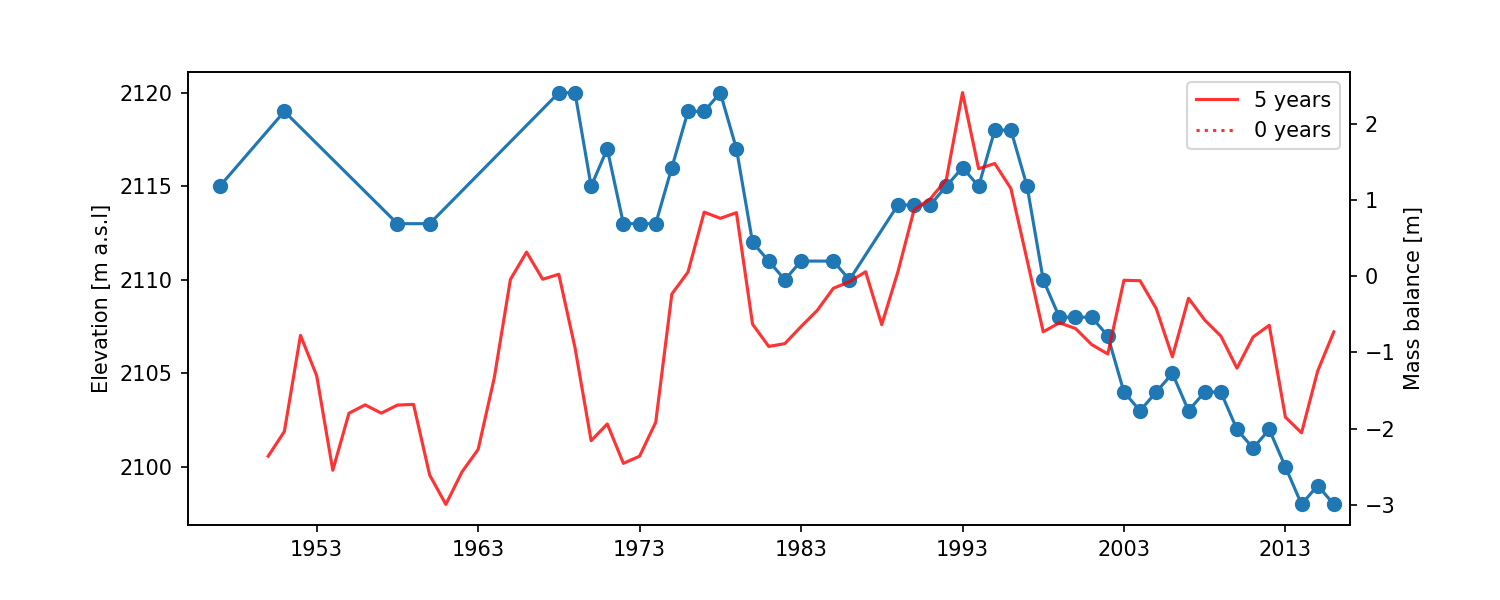

In [25]:
plt.figure(figsize=(10, 4))

plt.scatter(heights.index, heights, s=40)
plt.plot(heights.dropna())

plt.ylabel("Elevation [m a.s.l]")

plt.xlim(("1945", "2017"))

plt.gca().twinx()
a_years = 5
b_years = 0

averaged = balance["nb"].rolling(a_years).mean()
plt.plot(averaged, c="red", alpha=0.8, label=f"{a_years} years")

averaged2 = balance["nb"].rolling(b_years).mean()
plt.plot(averaged2, c="red", alpha=0.8, linestyle=":", label=f"{b_years} years")

plt.legend()

plt.ylabel("Mass balance [m]")
